python标准库支持复数运算,
例如 a = 1 - 2j

不要尝试暴力遍历进行傅里叶变换，时间复杂度太高!
尝试化成矩阵运算即可大大减少运算时间，二维离散傅里叶变换编程思路:
https://www.jianshu.com/p/98f493de01db

D:\Users\NPC\anaconda3\lib\site-packages\ipykernel_launcher.py:61: ComplexWarning: Casting complex values to real discards the imaginary part


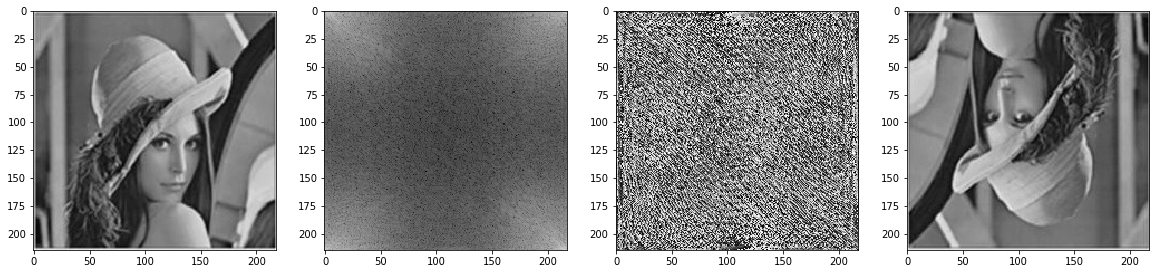

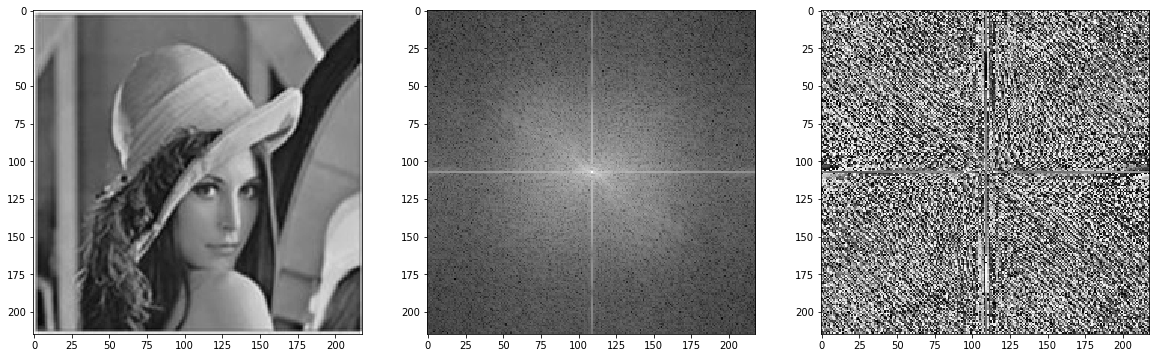

In [1]:
import numpy as np
import math
import utils


def FFT2(img,shift = False,depart = True):
    """
    img:单通道图片
    shift(False):是否将零频域转移到图像中心
    depart(True):是否将结果的实部和虚部分离
    """

    h,w = img.shape
    wMh = np.array([[hi for wi in range(w)] for hi in range(w)])
    wMw = np.array([[wi for wi in range(w)] for hi in range(w)])

    hMh = np.array([[hi for wi in range(h)] for hi in range(h)])
    hMw = np.array([[wi for wi in range(h)] for hi in range(h)])

    c1 = -2j * math.pi 

    G1 = np.power(math.e,c1 * wMw * wMh / w)
    G2 = np.power(math.e,c1 * hMw * hMh / h)

    res = np.dot(np.dot(G2,img),G1)

    if not depart:
        return res

    # print(res)

    #课上讲的
    # real,imag = np.real(res),np.imag(res)
    # stm = (real**2 + imag**2)**0.5
    # pse = np.arctan2(imag / real)

    #github上大神用的
    #先将零频域移到中心,就是将矩阵四角折到中心,注意,PPT上的示例增幅是没有移动的,而频率却移动了
    if shift:
        res = np.fft.fftshift(res)

    stm = np.log(np.abs(res))
    pse = np.angle(res)

    return  stm,pse

def iFFT2(fft2res):

    h,w = fft2res.shape
    wMh = np.array([[hi for wi in range(w)] for hi in range(w)])
    wMw = np.array([[wi for wi in range(w)] for hi in range(w)])

    hMh = np.array([[hi for wi in range(h)] for hi in range(h)])
    hMw = np.array([[wi for wi in range(h)] for hi in range(h)])

    c1 = -2j * math.pi 

    G3 = 1/w * np.power(math.e,c1 * wMw * wMh / w)
    G4 = 1/h * np.power(math.e,c1 * hMw * hMh / h)

    img = np.dot(np.dot(G4,fft2res),G3).astype(np.int)

    return  img


sample = utils.readGray("../imgs/c2/fft.jpg")
stm,pse = FFT2(sample)
res = FFT2(sample,depart=False)
# img = iFFT2(res)
# res = FFT2(img,depart=False)

funcs = [lambda img:img,lambda img:stm,lambda img:pse,lambda img:iFFT2(res)]
utils.compare(sample,funcs)

stm,pse = FFT2(sample,True)
res = FFT2(sample,depart=False)
funcs = [lambda img:img,lambda img:stm,lambda img:pse]
utils.compare(sample,funcs)

1.旋转特性,图像旋转,频谱图旋转

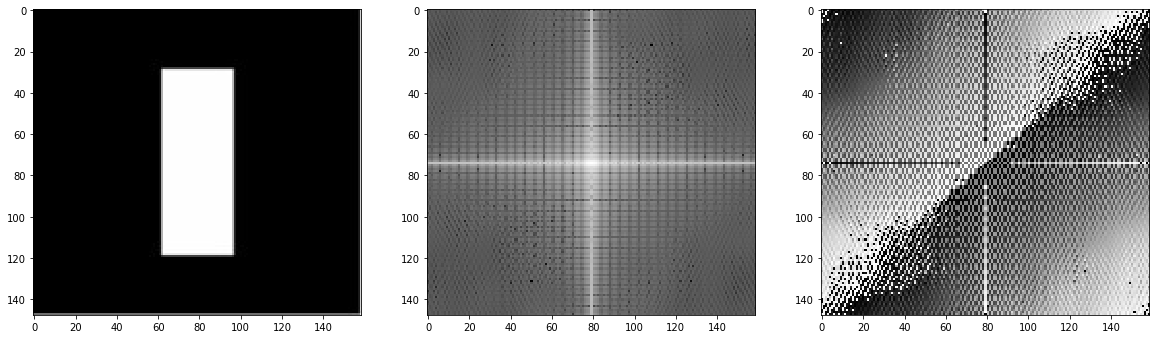

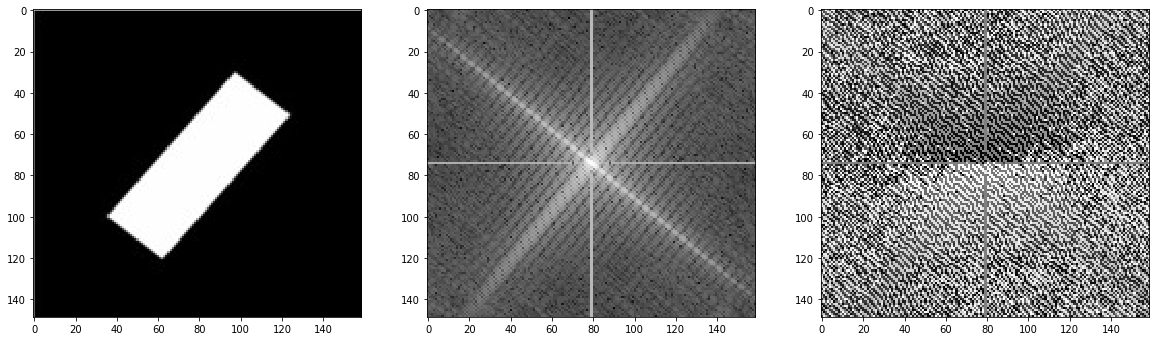

In [2]:
r1 = utils.readGray("../imgs/c2-2/fft-rotate-1.jpg")
r2 = utils.readGray("../imgs/c2-2/fft-rotate-2.jpg")

stm,pse = FFT2(r1,True)
funcs = [lambda img:r1,lambda img:stm,lambda img:pse]
utils.compare(sample,funcs)

stm,pse = FFT2(r2,True)
funcs = [lambda img:r2,lambda img:stm,lambda img:pse]
utils.compare(sample,funcs)

2.相关性质（失败，没有搞出类似ppt的性质）

D:\Users\NPC\anaconda3\lib\site-packages\ipykernel_launcher.py:61: ComplexWarning: Casting complex values to real discards the imaginary part


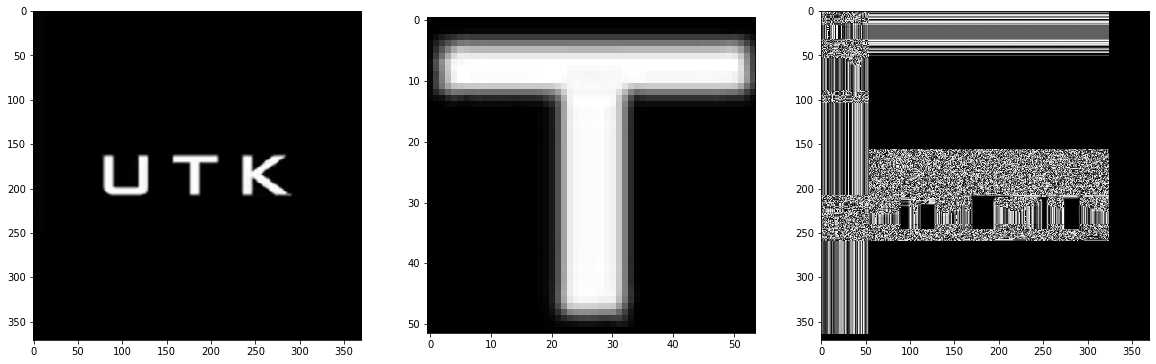

In [5]:
def silding_correlation(img_main,img_part):
    mh,mw = img_main.shape
    ph,pw = img_part.shape

    res = np.zeros_like(img_main)
    pfft2 = FFT2(img_part,depart=False)

    for hi in range(ph ,mh ,ph):
        for wi in range(pw ,mw , pw):
            tm = img_main[hi - ph:hi,wi - pw:wi]

            tpmfft2cj = np.conj(FFT2(tm,depart=False))
            
            corre_value =  tpmfft2cj * pfft2
            res[hi - ph:hi,wi - pw:wi] = iFFT2(corre_value)
            
    return res

img_utk = utils.readGray('../imgs/c2-2/correlation1.png')
img__t_ = utils.readGray('../imgs/c2-2/correlation2.png')

res = silding_correlation(img_utk,img__t_)
utils.compare(res,[lambda img:img_utk,lambda img:img__t_,lambda img:res])